# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib, pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
df = pd.read_csv('googleplaystore.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [6]:
df.shape

(10841, 13)

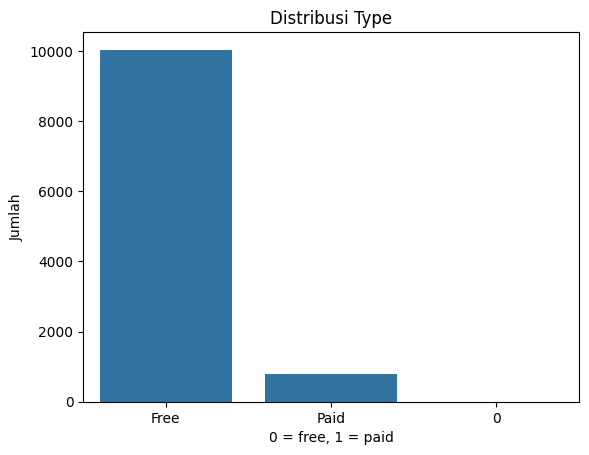

In [7]:
plt.Figure(figsize=(6,4))
sns.countplot(x='Type', data=df)
plt.title('Distribusi Type')
plt.xlabel('0 = free, 1 = paid')
plt.ylabel('Jumlah')
plt.show()

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(483)

In [10]:
df_missing = df[df.isnull().any(axis=1)]
display(df_missing)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [11]:
df_duplicated = df[df.duplicated(keep='first')]
display(df_duplicated)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [12]:
df.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

# Data Preprocessing

## Rename Column

In [13]:
rename_columns = {
    'Current Ver' : 'Current Version'
}

In [14]:
df = df.rename(columns=rename_columns)

In [15]:
df.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Version',
 'Android Ver']

## Drop Duplicated

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

## Handling Missing Value

In [18]:
df.isnull().sum()

App                   0
Category              0
Rating             1465
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        1
Genres                0
Last Updated          0
Current Version       8
Android Ver           3
dtype: int64

In [19]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [20]:
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

In [21]:
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])

In [22]:
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Version    8
Android Ver        3
dtype: int64

## Data Reduction

In [23]:
df = df.drop('Last Updated', axis=1)

In [24]:
df.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Current Version',
 'Android Ver']

## Handling Categorical Column

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Version,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [26]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [27]:
df['App'] = df['App'].apply(clean_text)

In [28]:
df['Category'] = df['Category'].apply(clean_text)

In [29]:
df['Type'] = df['Type'].apply(clean_text)

In [30]:
df['Content Rating'] = df['Content Rating'].apply(clean_text)

In [31]:
df['Genres'] = df['Genres'].apply(clean_text)

## Handling Numerical Column

In [32]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Version,Android Ver
0,photo editor candy camera grid scrapbook,artanddesign,4.1,159,19M,"10,000+",free,0,everyone,art design,1.0.0,4.0.3 and up
1,coloring book moana,artanddesign,3.9,967,14M,"500,000+",free,0,everyone,art designpretend play,2.0.0,4.0.3 and up
2,u launcher lite free live cool themes hide apps,artanddesign,4.7,87510,8.7M,"5,000,000+",free,0,everyone,art design,1.2.4,4.0.3 and up
3,sketch draw paint,artanddesign,4.5,215644,25M,"50,000,000+",free,0,teen,art design,Varies with device,4.2 and up
4,pixel draw number art coloring book,artanddesign,4.3,967,2.8M,"100,000+",free,0,everyone,art designcreativity,1.1,4.4 and up


In [33]:
def clean_number(number):
    numbers = re.sub(r'[^0-9\s]', '', number)
    return numbers

In [34]:
df['Reviews'] = df['Reviews'].apply(clean_number)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [35]:
df['Size'] = df['Size'].apply(clean_number)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [36]:
df['Installs'] = df['Installs'].apply(clean_number)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [37]:
df['Price'] = df['Price'].apply(clean_number)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Data Transformation

In [38]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Version,Android Ver
0,photo editor candy camera grid scrapbook,artanddesign,4.1,159,19.0,10000.0,free,0.0,everyone,art design,1.0.0,4.0.3 and up
1,coloring book moana,artanddesign,3.9,967,14.0,500000.0,free,0.0,everyone,art designpretend play,2.0.0,4.0.3 and up
2,u launcher lite free live cool themes hide apps,artanddesign,4.7,87510,87.0,5000000.0,free,0.0,everyone,art design,1.2.4,4.0.3 and up
3,sketch draw paint,artanddesign,4.5,215644,25.0,50000000.0,free,0.0,teen,art design,Varies with device,4.2 and up
4,pixel draw number art coloring book,artanddesign,4.3,967,28.0,100000.0,free,0.0,everyone,art designcreativity,1.1,4.4 and up


In [39]:
le = LabelEncoder()
scaler = MinMaxScaler()

In [40]:
categorical_columns = ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Version', 'Android Ver']

In [41]:
numerical_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [42]:
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [43]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [44]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Version,Android Ver
0,7129,1,0.172222,0.000002,0.008911,0.00001,1,0.0,1,9,118,15
1,2473,1,0.161111,0.000012,0.003960,0.00050,1,0.0,1,12,1018,15
2,8901,1,0.205556,0.001120,0.076238,0.00500,1,0.0,1,9,464,15
3,8015,1,0.194444,0.002759,0.014851,0.05000,1,0.0,4,9,2765,18
4,7192,1,0.183333,0.000012,0.017822,0.00010,1,0.0,1,11,277,20


In [48]:
df = df.dropna()

In [61]:
df.shape

(8831, 12)

# Build Model

## Data Splitting

In [70]:
df['Type'] = df['Type'].apply(lambda x: 1 if x == 1 else 0)
X = df.drop('Type', axis=1)
y = df['Type']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Balancing

In [72]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Model Training

In [73]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

## Model Evaluation & Metrics

In [74]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")
print("\nClassification Report : ")
print(classification_report(y_test, y_pred))

Accuracy : 1.00

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00      1635

    accuracy                           1.00      1767
   macro avg       1.00      1.00      1.00      1767
weighted avg       1.00      1.00      1.00      1767



## Confusion Matrix

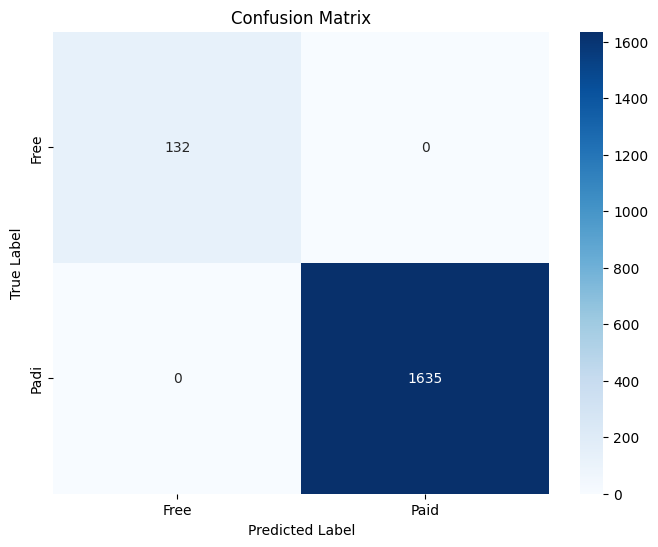

In [75]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Free', 'Paid'], yticklabels=['Free', 'Padi'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Train Test Accuracy

In [ ]:
# Akurasi pada data pelatihan
y_train_pred = rf_model.predict(X_train_balanced)
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
train_loss = 1 - train_accuracy

In [ ]:
# Akurasi pada data uji
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_loss = 1 - test_accuracy

In [ ]:
# Tampilkan akurasi dan loss
print(f"Train Accuracy : {train_accuracy:.2f}")
print(f"Train Loss     : {train_loss:.2f}")
print(f"Test Accuracy  : {test_accuracy:.2f}")
print(f"Test Loss      : {test_loss:.2f}")

## Model Saving

In [ ]:
# 6. Model Saving (optional)
joblib.dump(rf_model, 'random_forest_model.joblib')